In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Linear_Regression/Lineardata_train.csv')
df

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-7567.227845,2.029910,-0.928164,-2.463563,5.312071,2.070290,0.835355,-4.421930,18.292309,-10.357047,...,-2.827488,17.940836,25.724137,-29.713820,0.625372,-183.410260,19.439815,6.640099,-41.093484,-1.010290
49996,-9973.851789,-0.223475,0.341542,-4.423256,-0.104668,4.384320,-2.290826,4.612476,29.667901,-9.675776,...,-17.744738,-0.708422,15.907878,10.865072,-31.280568,-354.186800,6.363459,0.370644,35.952861,3.752642
49997,-8246.697221,-0.321085,1.608386,-11.177100,-1.140550,-10.832891,-8.625981,-27.740091,-14.166217,9.169728,...,3.841781,-17.941987,-2.167623,11.336067,-2.542123,-98.327808,-13.690353,-4.299753,16.053032,14.812715
49998,-9101.101377,-2.383432,1.214911,0.925113,0.017874,2.022561,1.209647,5.006908,-12.043059,-5.756141,...,5.308136,12.387029,20.220357,-1.359887,83.958829,-314.127483,-2.550699,-5.082801,7.514089,30.150485


In [ ]:
a=df.shape[0]
a -=1000
x_train=np.array(df.iloc[0:a,1:])
y_train=np.array(df.iloc[0:a,0:1])
x_val=np.array(df.iloc[a:,1:])
y_val=np.array(df.iloc[a:,0:1])
x_train.shape,y_train.shape

((49000, 20), (49000, 1))

Text(0.5, 0, 'Value')

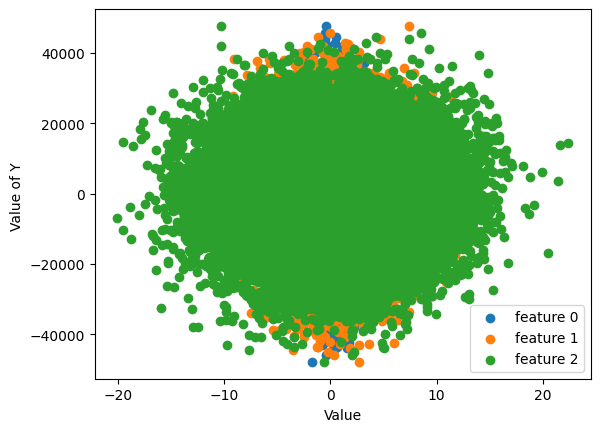

In [ ]:
for i in range(3):
  plt.scatter(x_train.T[i],y_train,label= f"feature {i}")
plt.legend()
plt.ylabel("Value of Y ")
plt.xlabel("Value")

In [ ]:
class Linear_Regression:
  def __init__(self, X, Y, learning_rate, iterations=1000, lambda_regularization=0.1, normalization=True):
    self.w = np.zeros((X.shape[1], 1))
    self.b = 0
    self.lambda_reg = lambda_regularization
    self.norm = normalization
    self.J_history = []
    self.Train(X, Y, learning_rate, iterations)

  def Normalization(self, X):
    self.mu = np.mean(X,axis=0)
    self.sigma = np.std(X,axis=0)
    if self.norm:
        X1 = (X - self.mu) / self.sigma
    else:
        X1 = X
    return X1

  def Gradient(self, X1, Y):
    m, n = X1.shape
    dj_dw = np.zeros((1, n))
    dj_db = 0
    dj_dw = (np.dot((np.dot(X1, self.w) + self.b - Y).T, X1) + self.lambda_reg * self.w.T) / m
    dj_dw = dj_dw.T
    dj_db = np.sum(np.dot(X1, self.w) + self.b - Y) / m
    return dj_dw, dj_db

  def Gradient_descent(self, X1, Y, learning_rate, iterations):
    for i in range(iterations):
      dj_dw, dj_db = self.Gradient(X1, Y)
      self.b -= learning_rate * dj_db
      self.w -= learning_rate * dj_dw
      if i % math.ceil(iterations / 10) == 0:
        self.J_history.append([self.Cost_function(X1, Y),i])
        print(f"Iteration {i:4}: Cost {self.J_history[-1][0]}")
    return np.array(self.J_history)

  def Cost_function(self, X1, Y):
    error = np.dot(X1, self.w) + self.b - Y
    error = error.reshape(1, -1)
    m = X1.shape[0]
    regularization_term = self.lambda_reg * np.sum(self.w**2)
    cost = (np.sum(error * error) + regularization_term) / (2 * m)
    return cost

  def Train(self, X, Y, learning_rate, iterations):
    X1 = self.Normalization(X)
    self.J_history = self.Gradient_descent(X1, Y, learning_rate, iterations)
    #self.J_history gets updated from a list to numpy array in above line
    self.Plot_cost()

  def evaluate(self, X_test_data):
    if self.norm:
      X_test_data_norm = (X_test_data - self.mu) / self.sigma
    else:
      X_test_data_norm = X_test_data
    Y = (np.dot(X_test_data_norm, self.w) + self.b)
    return Y

  def r2_score(self, X_test,Y_test):
    Y_pred = self.evaluate(X_test)
    print("R2 score: ", end="")
    return (1 - (np.sum((Y_test - Y_pred)**2)) / (np.sum((Y_test - np.mean(Y_test))**2)))

  def Plot_cost(self):
    plt.plot(self.J_history[0:,1].reshape(-1,1),self.J_history[0:,0].reshape(-1,1))
    plt.ylabel("Cost")
    plt.xlabel("Iterations")

Iteration    0: Cost 53093112.63860918
Iteration   50: Cost 1396.061066202985
Iteration  100: Cost 0.04271309625451242
Iteration  150: Cost 0.005050773642195185
Iteration  200: Cost 0.0050497333888130085
Iteration  250: Cost 0.005049733359446907
Iteration  300: Cost 0.005049733359446568
Iteration  350: Cost 0.0050497333594476885
Iteration  400: Cost 0.0050497333594476685
Iteration  450: Cost 0.0050497333594476685


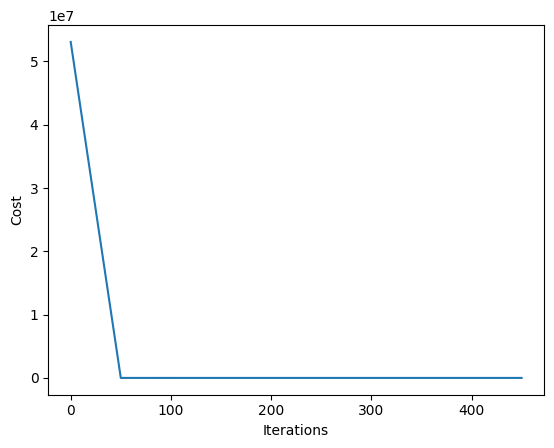

In [ ]:
model = Linear_Regression(x_train,y_train,0.1,500,normalization=True,lambda_regularization=0)

In [35]:
print(model.r2_score(x_train,y_train))

R2 score: 0.9999999999229953


In [ ]:
print(model.r2_score(x_val,y_val))

R2 score: 0.9999999999187164


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Linear_Regression/Lineardata_test.csv')
df1

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19851,1.967136,-6.819440,3.597360,-0.482508,4.679231,0.861442,8.810749,-20.384415,20.427585,...,1.489196,12.767614,52.530303,20.517596,-42.428871,35.227784,-9.244004,-18.759314,-42.260514,-2.261597
9996,11818,-0.656285,-3.294604,12.222256,-0.184108,8.286414,-6.437312,-19.611691,-13.487207,23.986240,...,9.897794,-15.720693,26.401396,11.421553,-104.558180,-318.607244,-7.446830,-6.457686,12.002813,-20.317446
9997,15552,-0.349932,4.611955,-2.814735,1.851754,-2.354195,6.639817,-25.299515,-3.145723,-41.248652,...,19.601819,-3.216492,-17.299449,-8.975811,59.531358,244.333157,28.656620,11.294024,1.441938,4.395482
9998,12161,0.295833,1.825552,-8.824731,2.119270,-4.629213,-2.354794,0.919091,52.204003,7.350877,...,10.640964,11.686231,7.259193,7.733906,54.680591,-472.335102,-24.281308,-16.099344,10.744757,6.578695


In [ ]:
x_test = np.array(df1.iloc[:,1:] , dtype = np.int32)
id = np.array(df1.iloc[:,0] , dtype = int)

In [ ]:
pred = model.evaluate(x_test).reshape(-1)

In [ ]:
submission = pd.DataFrame({"Id":id , "Output":pred})
submission

,Id,Output
0,14189,-5503.998891
1,14742,17426.001901
2,13905,4560.001114
3,10072,2363.001066
4,14879,3685.997597
...,...,...
9995,19851,3908.999234
9996,11818,-15836.001102
9997,15552,9471.003087
9998,12161,-15464.998320


In [ ]:
submission.to_csv("/content/drive/MyDrive/WOC_6.0/Linear_Regression/Submission_linear.csv")